# [AB Testing] - Fast Food Marketing Campaign Experiment
### by Fajar Tirtayasa

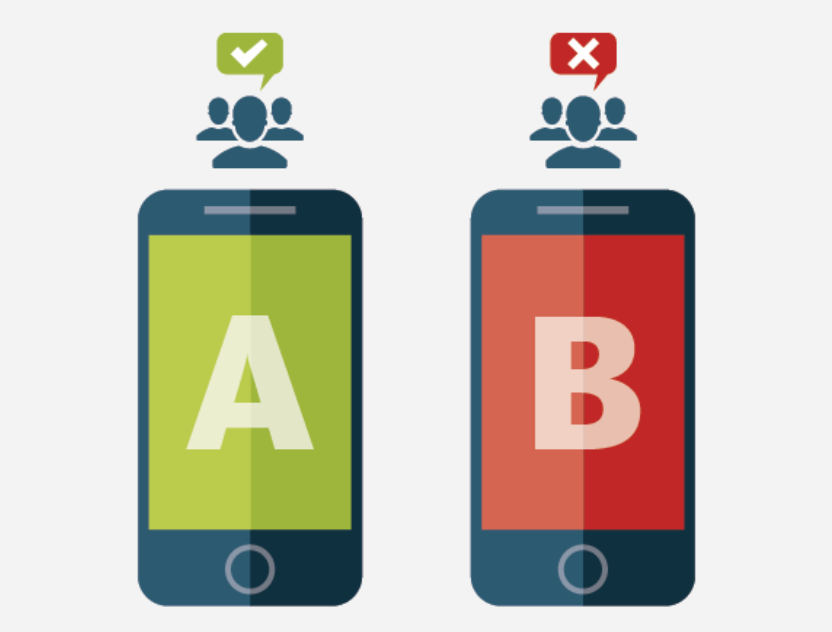

## [Context & Content]
Suatu perusahaan makanan cepat saji berencana untuk menambahkan item baru ke menunya. Namun mereka masih belum memutuskan mana di antara **tiga kemungkinan marketing campaign** yang akan digunakan untuk promosi produk tersebut. Untuk menentukan promosi mana yang memiliki pengaruh terbesar pada penjualan, item baru diperkenalkan di lokasi di beberapa pasar yang dipilih secara acak. Promosi yang berbeda digunakan di setiap lokasi, dan penjualan mingguan item baru **dicatat selama empat minggu pertama**. Tujuannya adalah untuk **mengevaluasi hasil pengujian A/B dan memutuskan strategi pemasaran mana yang paling berhasil**.

Dataset: https://drive.google.com/drive/folders/1uzQ0UI1VUogXMss1wMYur3avnyVFPpcE

## [Load Data]

In [69]:
import pandas as pd

df = pd.read_csv('/Data Science/PROA - Data Visualization/Fast Food Dataset/WA_Marketing-Campaign.csv')
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


## [Exploratory Data Analysis]
### Checking Data

In [70]:
df.sample(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
204,5,Medium,402,25,2,1,40.40
385,8,Medium,702,13,1,2,45.02
26,1,Medium,7,15,1,3,51.72
466,9,Medium,810,13,1,3,58.00
104,3,Large,208,1,3,1,96.48
482,10,Large,904,10,2,3,44.16
309,6,Medium,513,7,1,2,41.71
39,1,Medium,10,5,2,4,35.16
150,3,Large,219,7,2,3,83.40
154,3,Large,220,3,1,3,99.12


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [72]:
df['LocationID'] = df['LocationID'].astype('object')
df['Promotion'] = df['Promotion'].astype('category')
df['week'] = df['week'].astype('category')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   MarketID          548 non-null    int64   
 1   MarketSize        548 non-null    object  
 2   LocationID        548 non-null    object  
 3   AgeOfStore        548 non-null    int64   
 4   Promotion         548 non-null    category
 5   week              548 non-null    category
 6   SalesInThousands  548 non-null    float64 
dtypes: category(2), float64(1), int64(2), object(2)
memory usage: 22.9+ KB


In [74]:
df.describe()

,MarketID,AgeOfStore,SalesInThousands
count,548.000000,548.000000,548.000000
mean,5.715328,8.503650,53.466204
std,2.877001,6.638345,16.755216
min,1.000000,1.000000,17.340000
25%,3.000000,4.000000,42.545000
50%,6.000000,7.000000,50.200000
75%,8.000000,12.000000,60.477500
max,10.000000,28.000000,99.650000


In [75]:
df.describe(include='object')

,MarketSize,LocationID
count,548,548
unique,3,137
top,Medium,1
freq,320,4


In [76]:
df.describe(include='category')

,Promotion,week
count,548,548
unique,3,4
top,2,1
freq,188,137


### The Amount of Data for Each Promotion

In [77]:
cek = pd.DataFrame(df.groupby('Promotion')['Promotion'].count())
cek = cek.rename(columns={'Promotion':'Count of Promotion'})
cek = cek.reset_index()
cek

,Promotion,Count of Promotion
0,1,172
1,2,188
2,3,188


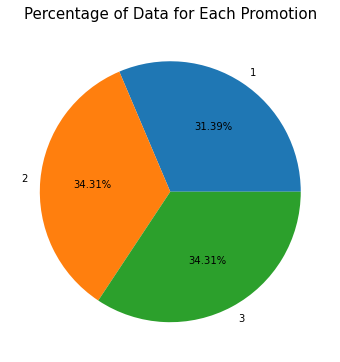

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
plt.pie(cek['Count of Promotion'], labels = cek['Promotion'], autopct='%1.2f%%')
plt.title('Percentage of Data for Each Promotion', loc='center', pad=10, fontsize=15)
plt.show()

### The Amount of Data for Each Market Size

In [79]:
cek2 = pd.DataFrame(df.groupby('MarketSize')['MarketSize'].count())
cek2 = cek2.rename(columns={'MarketSize':'Count of MarketSize'})
cek2 = cek2.reset_index()
cek2

,MarketSize,Count of MarketSize
0,Large,168
1,Medium,320
2,Small,60


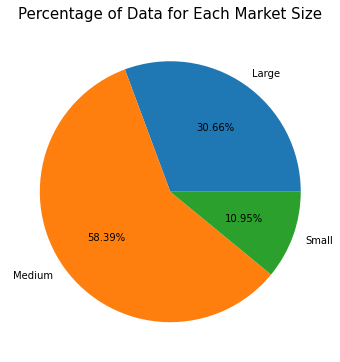

In [80]:
plt.figure(figsize=(6,6))
plt.pie(cek2['Count of MarketSize'], labels = cek2['MarketSize'], autopct='%1.2f%%')
plt.title('Percentage of Data for Each Market Size', loc='center', pad=10, fontsize=15)
plt.show()

### Total Sales, Breakdown by Market Size

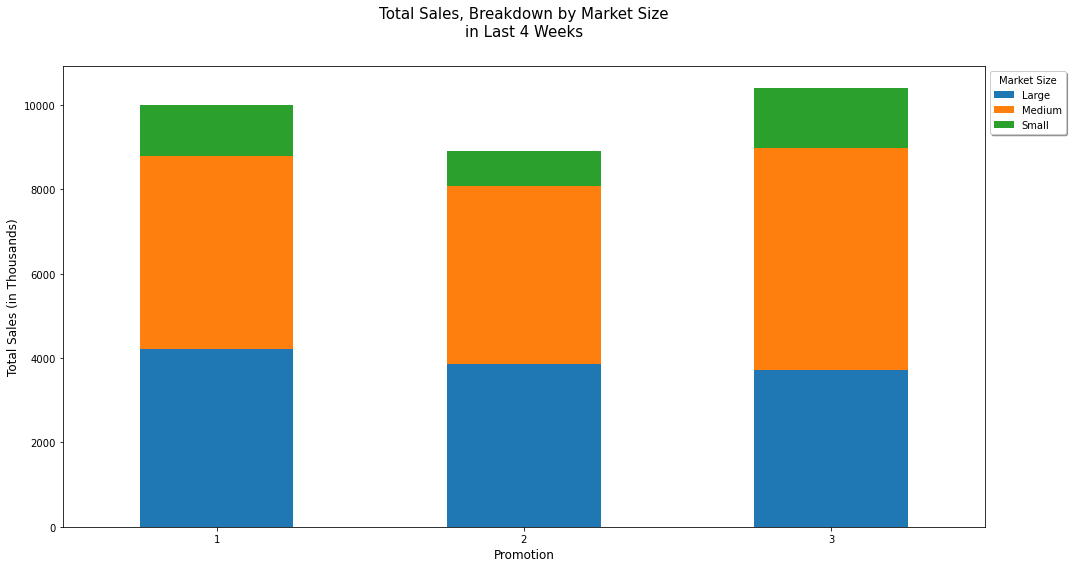

In [81]:
df.groupby(['Promotion', 'MarketSize'])['SalesInThousands'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True)
plt.title('Total Sales, Breakdown by Market Size\nin Last 4 Weeks', loc='center', pad=30, fontsize=15)
plt.xlabel('Promotion', fontsize=12)
plt.ylabel('Total Sales (in Thousands)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='Market Size')
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.gcf().set_size_inches(15,8)
plt.tight_layout()
plt.show()

### Average Sales per Week for Each Promotion in All Market Size

In [82]:
df_avg_sales_per_week = df.groupby(['week', 'Promotion'])['SalesInThousands'].mean().unstack()
df_avg_sales_per_week

Promotion,1,2,3
week,,,
1,58.244419,47.730213,55.776170
2,56.929535,47.582553,55.949149
3,58.774884,47.722128,54.377872
4,58.447209,46.282766,55.354681


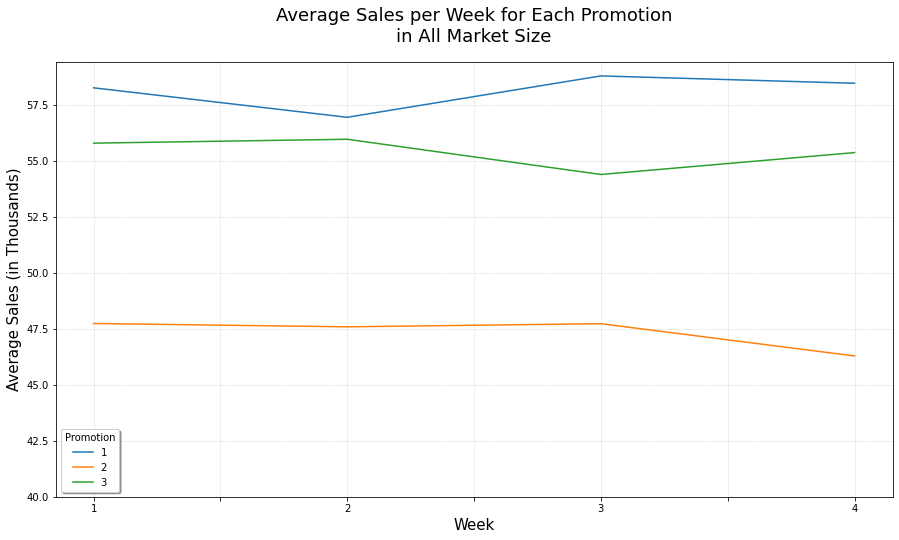

In [83]:
df_avg_sales_per_week.plot()
plt.title('Average Sales per Week for Each Promotion\nin All Market Size', fontsize=18, pad=20)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Average Sales (in Thousands)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=40)
plt.gcf().set_size_inches(15,8)
plt.legend(loc='lower left', shadow=True, ncol=1, title='Promotion')

### Splitting DataFrame into 3 Market Size: Small, Medium, and Large

In [84]:
df_small = df.loc[df['MarketSize']=='Small']
df_medium = df.loc[df['MarketSize']=='Medium']
df_large = df.loc[df['MarketSize']=='Large']

### Average Sales per Week for Each Promotion in Small Market Size

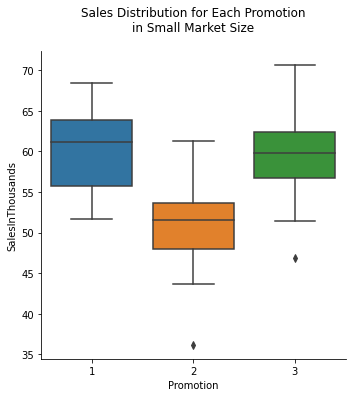

In [85]:
box_plot = sns.catplot(x='Promotion',
                      y='SalesInThousands',
                      data=df_small,
                      kind='box')
plt.title('Sales Distribution for Each Promotion\nin Small Market Size', pad=20)
plt.show()

In [86]:
df_small_avg_sales_per_week = df_small.groupby(['week', 'Promotion'])['SalesInThousands'].mean().unstack()
df_small_avg_sales_per_week

Promotion,1,2,3
week,,,
1,58.676,49.0875,58.991667
2,62.286,51.8700,60.203333
3,59.078,46.9250,57.856667
4,60.610,55.3600,61.005000


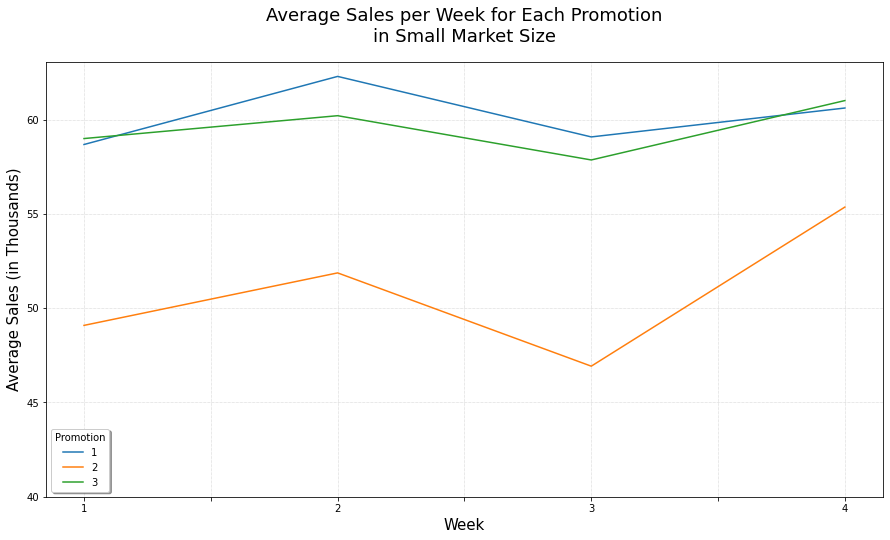

In [87]:
df_small_avg_sales_per_week.plot()
plt.title('Average Sales per Week for Each Promotion\nin Small Market Size', fontsize=18, pad=20)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Average Sales (in Thousands)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=40)
plt.gcf().set_size_inches(15,8)
plt.legend(loc='lower left', shadow=True, ncol=1, title='Promotion')

### Average Sales per Week for Each Promotion in Medium Market Size

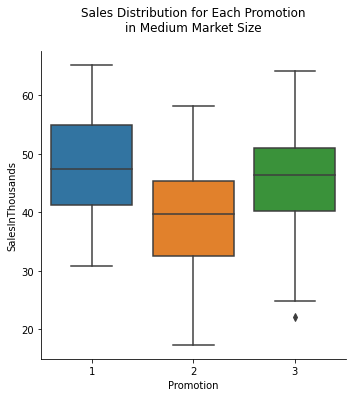

In [88]:
box_plot = sns.catplot(x='Promotion',
                      y='SalesInThousands',
                      data=df_medium,
                      kind='box')
plt.title('Sales Distribution for Each Promotion\nin Medium Market Size', pad=20)
plt.show()

In [89]:
df_medium_avg_sales_per_week = df_medium.groupby(['week', 'Promotion'])['SalesInThousands'].mean().unstack()
df_medium_avg_sales_per_week

Promotion,1,2,3
week,,,
1,48.355833,40.018148,45.216552
2,46.313333,39.971481,46.879310
3,48.970417,39.532593,44.342414
4,47.050833,36.935185,45.437241


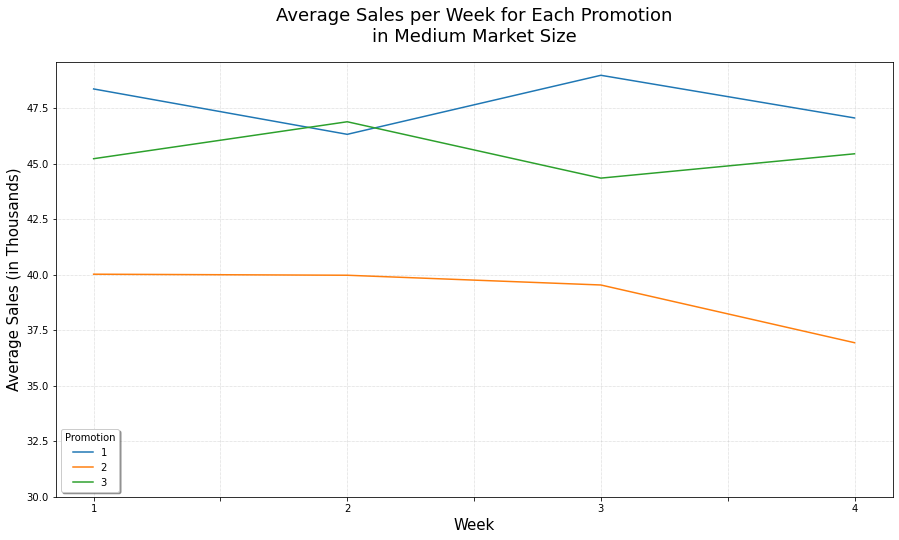

In [90]:
df_medium_avg_sales_per_week.plot()
plt.title('Average Sales per Week for Each Promotion\nin Medium Market Size', fontsize=18, pad=20)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Average Sales (in Thousands)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=30)
plt.gcf().set_size_inches(15,8)
plt.legend(loc='lower left', shadow=True, ncol=1, title='Promotion')

### Average Sales per Week for Each Promotion in Large Market Size

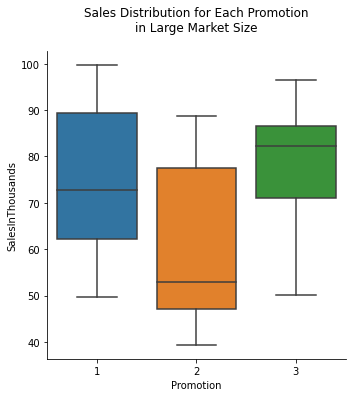

In [91]:
box_plot = sns.catplot(x='Promotion',
                      y='SalesInThousands',
                      data=df_large,
                      kind='box')
plt.title('Sales Distribution for Each Promotion\nin Large Market Size', pad=20)
plt.show()

In [92]:
df_large_avg_sales_per_week = df_large.groupby(['week', 'Promotion'])['SalesInThousands'].mean().unstack()
df_large_avg_sales_per_week

Promotion,1,2,3
week,,,
1,75.042143,60.405000,79.687500
2,73.215714,59.354375,75.740833
3,75.474286,61.741250,76.890833
4,77.211429,59.787500,76.496667


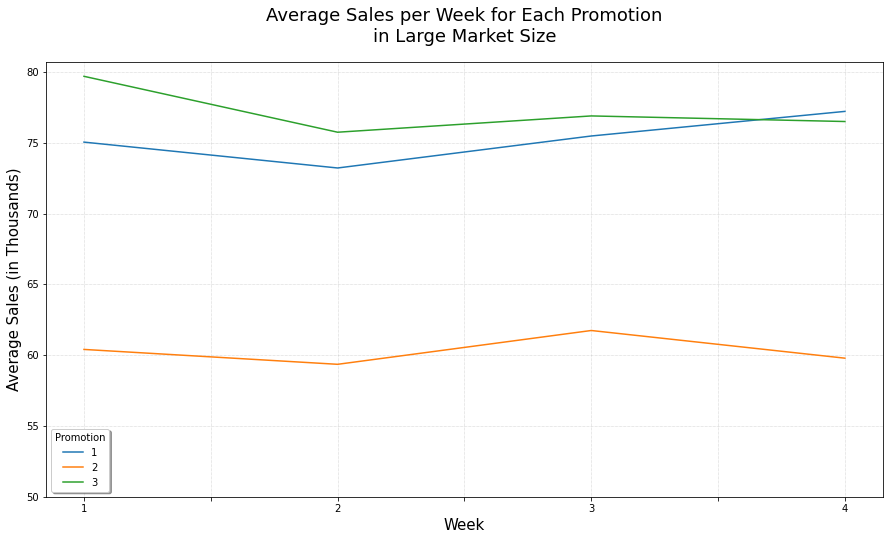

In [93]:
df_large_avg_sales_per_week.plot()
plt.title('Average Sales per Week for Each Promotion\nin Large Market Size', fontsize=18, pad=20)
plt.xlabel('Week', fontsize=15)
plt.ylabel('Average Sales (in Thousands)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=50)
plt.gcf().set_size_inches(15,8)
plt.legend(loc='lower left', shadow=True, ncol=1, title='Promotion')

### Some Insight Gained from The Exploratory Data Analysis Process
1. Segmentasi pasar untuk perusahaan _fast food_ yang sedang diamati ini didominasi oleh market berukuran menengah. Hal ini ditunjukkan dengan besarnya persentase market berukuran menengah, yakni di atas 50%.
2. Secara keseluruhan, _Market Size_ yang menggunakan _marketing campaign_ no.3 menyumbang total penjualan _fast food_ tertinggi.
3. Performa rata-rata penjualan mingguan untuk _Market Size_ 'Kecil', 'Menengah', maupun 'Besar' menunjukkan hasil yang relatif lebih baik ketika menggunakan _marketing campaign_ no.1 atau no.3, dibandingkan dengan no.2.

Selanjutnya, akan dilakukan tes signifikansi dengan t-test untuk menguji apakah terdapat perbedaan yang signifikan antara rata-rata penjualan dari setiap _marketing campaign_.

## [Hypothesis]
H0: Rata-rata penjualan antara dua buah _marketing campaign_ adalah sama.

H1: Rata-rata penjualan antara dua buah _marketing campaign_ adalah berbeda.

In [94]:
from scipy.stats import ttest_ind

def test_2_groups(arr_1, arr_2, alpha):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Sebaran distribusinya SAMA (tidak cukup bukti menolak H0)')
    else:
        print('Sebaran distribusi BERBEDA (menolak H0)')

mc_1 = df.loc[df['Promotion']==1, 'SalesInThousands']
mc_2 = df.loc[df['Promotion']==2, 'SalesInThousands']
mc_3 = df.loc[df['Promotion']==3, 'SalesInThousands']

## [Hypothesis Test 1 : Marketing Campaign 1 and 2]

In [95]:
test_2_groups(mc_1, mc_2, 0.05)

Statistics=6.454, p=0.000
Sebaran distribusi BERBEDA (menolak H0)


## [Hypothesis Test 2 : Marketing Campaign 1 and 3]

In [96]:
test_2_groups(mc_1, mc_3, 0.05)

Statistics=1.555, p=0.121
Sebaran distribusinya SAMA (tidak cukup bukti menolak H0)


## [Hypothesis Test 3 : Marketing Campaign 2 and 3]

In [97]:
test_2_groups(mc_2, mc_3, 0.05)

Statistics=-4.881, p=0.000
Sebaran distribusi BERBEDA (menolak H0)


## [Conclusion]
Berdasarkan hipotesis yang telah ditetapkan, H0 akan ditolak apabila nilai p-value < alpha=0.05.

Sehingga dapat diketahui:
1. Terdapat perbedaan yang signifikan antara _marketing campaign_ no.1 dan no.2.
2. Tidak terdapat perbedaan yang signifikan antara _marketing campaign_ no.1 dan no.3.
3. Terdapat perbedaan yang signifikan antara _marketing campaign_ no.2 dan no.3.

Berdasarkan hasil ketiga pengujian hipotesis di atas, serta _insight_ yang diperoleh pada tahap _exploratory data analysis_, dapat disimpulkan bahwa perusahaan _fast food_ tersebut lebih baik menggunakan **_marketing campaign_ no.1 atau no.3** sebagai strategi pemasaran produk baru yang akan di-_launching_.